In [2]:
import numpy as np
import scipy.stats
import pandas as pd
import matplotlib
import matplotlib.pyplot as pp


In [3]:
from IPython import display
from ipywidgets import widgets, interact

%matplotlib inline

In [4]:
import re
import mailbox
import csv

In [5]:
china1965 = pd.read_csv("C:/Users/bithi/OneDrive/Documents/EGDownloads/Document/Ex_Files_Python_Statistics_EssT/Ex_Files_Python_Statistics_EssT/Exercise Files/chapter3/03_02/income-1965-china.csv")
usa1965= pd.read_csv("C:/Users/bithi/OneDrive/Documents/EGDownloads/Document/Ex_Files_Python_Statistics_EssT/Ex_Files_Python_Statistics_EssT/Exercise Files/chapter3/03_02/income-1965-usa.csv")
china2015 = pd.read_csv("C:/Users/bithi/OneDrive/Documents/EGDownloads/Document/Ex_Files_Python_Statistics_EssT/Ex_Files_Python_Statistics_EssT/Exercise Files/chapter3/03_02/income-2015-china.csv")
usa2015= pd.read_csv("C:/Users/bithi/OneDrive/Documents/EGDownloads/Document/Ex_Files_Python_Statistics_EssT/Ex_Files_Python_Statistics_EssT/Exercise Files/chapter3/03_02/income-2015-usa.csv")


In [6]:
china1965.head(10)

,income,log10_income
0,1.026259,0.011257
1,0.912053,-0.039980
2,0.110699,-0.955857
3,0.469659,-0.328217
4,0.374626,-0.426402
5,0.389658,-0.409317
6,0.281035,-0.551239
7,0.881215,-0.054918
8,1.638738,0.214509
9,0.263616,-0.579028


In [7]:
china1965.mean()

income          0.660597
log10_income   -0.274157
dtype: float64

In [8]:
china1965.max()

income          5.426802
log10_income    0.734544
dtype: float64

In [9]:
china1965.var(ddof=0)

income          0.208846
log10_income    0.088610
dtype: float64

In [10]:
china1965.quantile([0.25,0.75])

,income,log10_income
0.25,0.344130,-0.463277
0.75,0.863695,-0.063640


In [11]:
scipy.stats.percentileofscore(china1965.income,1.5)

95.5

In [12]:
china1965.describe()

,income,log10_income
count,1000.000000,1000.000000
mean,0.660597,-0.274157
std,0.457226,0.297822
min,0.041968,-1.377078
25%,0.344130,-0.463277
50%,0.557477,-0.253773
75%,0.863695,-0.063640
max,5.426802,0.734544


In [13]:
usa1965.describe()

,income,log10_income
count,1000.000000,1000.000000
mean,31.587965,1.418835
std,22.101531,0.262200
min,4.177852,0.620953
25%,17.498592,1.243003
50%,26.069531,1.416133
75%,39.017113,1.591255
max,246.030397,2.390989


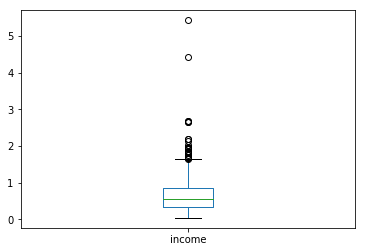

In [14]:
china1965.income.plot(kind='box')

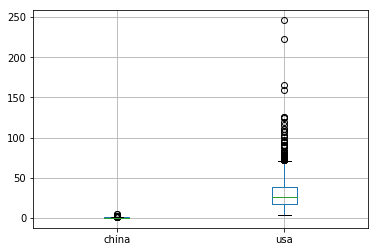

In [15]:
pd.DataFrame({'china' : china1965.income, 'usa' : usa1965.income}).boxplot()

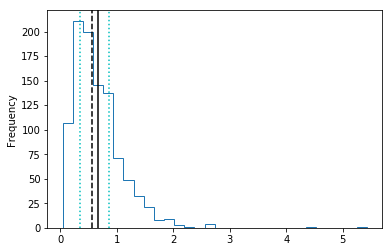

In [16]:
china1965.income.plot(kind='hist',histtype='step',bins=30)

pp.axvline(china1965.income.mean(), color ='k')
pp.axvline(china1965.income.median(), color='k', linestyle='--')
pp.axvline(china1965.income.quantile(0.25), color='c', linestyle=':')
pp.axvline(china1965.income.quantile(0.75), color='c', linestyle=':')


(0, 3, 0.0, 1.2342999882944066)

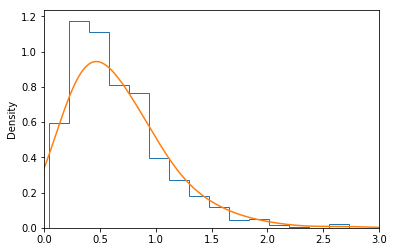

In [17]:
#for normalising the histogram use density feature
china1965.income.plot(kind='hist',histtype='step',bins=30, density=True)
china1965.income.plot.density(bw_method=0.5)

pp.axis(xmin=0, xmax=3)

In [19]:
gapminder = pd.read_csv("C:/Users/bithi/OneDrive/Documents/EGDownloads/Document/Ex_Files_Python_Statistics_EssT/Ex_Files_Python_Statistics_EssT/Exercise Files/chapter3/03_04/gapminder.csv")

In [20]:
china_pop2015 =float(gapminder.query('country == "China" and year == 2015').population)
usa_pop2015 =float(gapminder.query('country == "United States" and year == 2015').population)
china_pop2015, usa_pop2015


(1376048943.0, 321773631.0)

In [21]:
gapminder.query('country == "China" and year == 2015')

,country,year,region,population,life_expectancy,age5_surviving,babies_per_woman,gdp_per_capita,gdp_per_day
2834,China,2015,Asia,1.376049e+09,76.2,98.93,1.57,13334.0,36.506502


In [22]:
china2015['weight'] = china_pop2015/ len(china2015)

In [23]:
gapminder.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14740 entries, 0 to 14739
Data columns (total 9 columns):
country             14740 non-null object
year                14740 non-null int64
region              14740 non-null object
population          14740 non-null float64
life_expectancy     14740 non-null float64
age5_surviving      14740 non-null float64
babies_per_woman    14740 non-null float64
gdp_per_capita      14740 non-null float64
gdp_per_day         14740 non-null float64
dtypes: float64(6), int64(1), object(2)
memory usage: 1.0+ MB


In [24]:
italy = gapminder.query('country == "Italy"')
italy.head()

,country,year,region,population,life_expectancy,age5_surviving,babies_per_woman,gdp_per_capita,gdp_per_day
6397,Italy,1800,Europe,18822234.0,29.69,54.259,5.47,2225.0,6.091718
6398,Italy,1810,Europe,19491674.0,29.69,54.395,5.47,2371.0,6.491444
6399,Italy,1820,Europe,20341608.0,29.69,54.531,5.47,2474.0,6.773443
6400,Italy,1830,Europe,21529667.0,29.69,54.667,5.47,2471.0,6.765229
6401,Italy,1840,Europe,22956667.0,29.69,54.804,5.47,2524.0,6.910335


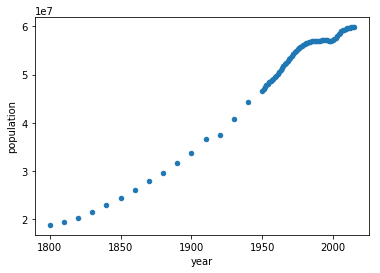

In [25]:
italy.plot.scatter("year","population")

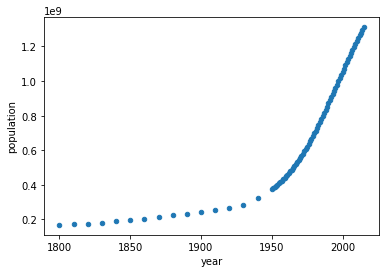

In [26]:
gapminder.query('country == "India"').plot.scatter("year","population")

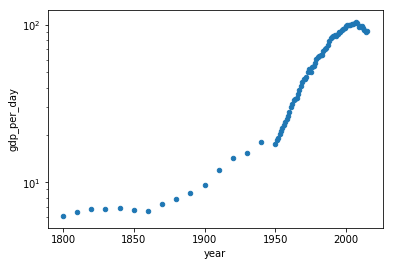

In [27]:
italy.plot.scatter("year","gdp_per_day", logy=True)

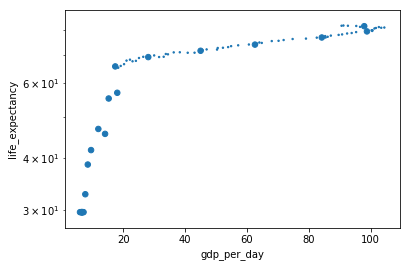

In [28]:
size =np.where(italy.year%10==0,30,2)
italy.plot.scatter("gdp_per_day","life_expectancy", logy=True, s=size)

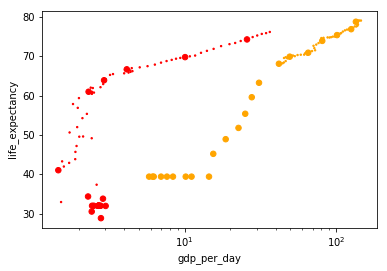

In [29]:
data = gapminder.query('(country =="China") or (country=="United States" )')
size =np.where(italy.year%10==0,30,2)
color = np.where(data.country == 'China','red','orange')
data.plot.scatter("gdp_per_day","life_expectancy", logx=True, s=size, c= color)

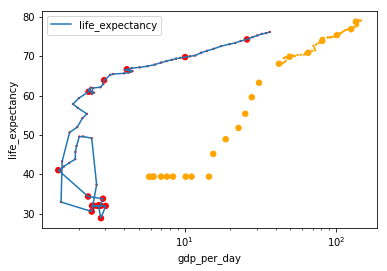

In [30]:
data = gapminder.query('(country =="China") or (country=="United States" )')

size =np.where(italy.year%10==0,30,2)
color = np.where(data.country == 'China','red','orange')

ax = data.plot.scatter("gdp_per_day","life_expectancy", logx=True, s=size, c= color)

data[data.country =="China"].plot.line(x='gdp_per_day', y='life_expectancy', ax=ax)

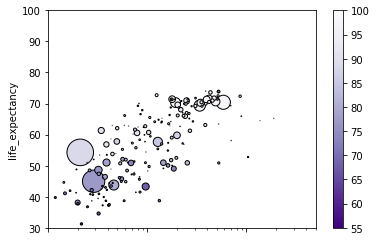

In [31]:
def plotyear(year):
    data = gapminder[gapminder.year == year].sort_values('population', ascending = False)
    area = 1e-6 * data.population
    color = data.age5_surviving
    edgecolor = data.region.map({'Africa':'skyblue', 'Europe':'Gold','America':'Palegreen','Asia':'Coral'})
    
    data.plot.scatter('gdp_per_day','life_expectancy', logx=True, s=area,c=color,
                       colormap = matplotlib.cm.get_cmap('Purples_r'), vmin=55, vmax=100,
                       linewidths=1, edgecolors ='k')
    pp.axis(xmin=1,xmax=500,ymin=30,ymax=100)
    
plotyear(1965)

In [32]:
interact(plotyear, year=range(1965,2016,10))

interactive(children=(Dropdown(description='year', options=(1965, 1975, 1985, 1995, 2005, 2015), value=1965), …

<function __main__.plotyear(year)>

In [33]:
gapminder[gapminder.year==2015].population.sum()

7292414176.0

In [34]:
gapminder[gapminder.year==2015].groupby('region').population.sum()

region
Africa     1.172161e+09
America    9.865771e+08
Asia       4.299142e+09
Europe     8.345345e+08
Name: population, dtype: float64

In [35]:
smoking =pd.read_csv("C:/Users/bithi/OneDrive/Documents/EGDownloads/Document/Ex_Files_Python_Statistics_EssT/Ex_Files_Python_Statistics_EssT/Exercise Files/chapter3/03_06/whickham.csv")

In [36]:
smoking.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1314 entries, 0 to 1313
Data columns (total 3 columns):
outcome    1314 non-null object
smoker     1314 non-null object
age        1314 non-null int64
dtypes: int64(1), object(2)
memory usage: 30.9+ KB


In [37]:
smoking.head()

,outcome,smoker,age
0,Alive,Yes,23
1,Alive,Yes,18
2,Dead,Yes,71
3,Alive,No,67
4,Alive,No,64


In [38]:
pd.DataFrame(smoking.outcome.value_counts())

,outcome
Alive,945
Dead,369


In [39]:
bysmoker= smoking.groupby('smoker').outcome.value_counts(normalize=True)
bysmoker

smoker  outcome
No      Alive      0.685792
        Dead       0.314208
Yes     Alive      0.761168
        Dead       0.238832
Name: outcome, dtype: float64

In [40]:
bysmoker.index

MultiIndex(levels=[['No', 'Yes'], ['Alive', 'Dead']],
           labels=[[0, 0, 1, 1], [0, 1, 0, 1]],
           names=['smoker', 'outcome'])

In [41]:
bysmoker.unstack()

outcome,Alive,Dead
smoker,,
No,0.685792,0.314208
Yes,0.761168,0.238832


In [97]:
smoking['agegroup']= pd.cut(smoking.age,[0,30,40,53,64], labels= ['0-30','30-40','40-53','53-64'])

In [98]:
smoking['agegroup'].head()

0     0-30
1     0-30
2      NaN
3      NaN
4    53-64
Name: agegroup, dtype: category
Categories (4, object): [0-30 < 30-40 < 40-53 < 53-64]

In [99]:
smoking['age'].head()

0    23
1    18
2    71
3    67
4    64
Name: age, dtype: int64

In [105]:
byage = smoking.groupby(['agegroup','smoker']).outcome.value_counts(normalize=True)


In [108]:
byage.unstack().drop("Dead",axis=1)

outcome             Alive
agegroup smoker          
0-30     No      0.981818
         Yes     0.975610
30-40    No      0.955224
         Yes     0.940678
40-53    No      0.876106
         Yes     0.802395
53-64    No      0.669291
         Yes     0.580645